#### [bosch kaggle info](https://www.kaggle.com/c/bosch-production-line-performance/data)

[pyspark doc](https://spark.apache.org/docs/2.0.0-preview/api/python/_modules/pyspark/sql/session.html)

** file path **
/home/h/fun/bosch/raw_data

Data Files

- ** 目标是要预测哪个部分会在质量控制过程中失败，用'Response' = 1表示该状态。**
- ** 数据集包含了非常大的匿名特征数据。**
- ** 数据已经按照类型切成两类，数值型和类别型两个大文件。日期特征给每个测量值提供了发生的时间戳。每个日期列都对应于每个特征的生成日期，如L0_S0_D1是特征列L0_S0_F0的日期列。 ** 
- ** 难点： 量大，正负样本的极度不均衡 **

File descriptions

* train_numeric.csv - the training set numeric features (this file contains the 'Response' variable) 
* test_numeric.csv - the test set numeric features (you must predict the 'Response' for these Ids)  
* train_categorical.csv - the training set categorical features  
* test_categorical.csv - the test set categorical features  
* train_date.csv - the training set date features  
* test_date.csv - the test set date features  
* sample_submission.csv - a sample submission file in the correct format 

In [14]:
%cd raw_data/
%ls
%cd ..

/home/h/kaggle_fun/bosch/raw_data
down_data/            test_numeric.csv       train_numeric.csv
test_categorical.csv  train_categorical.csv  zips/
test_date.csv         train_date.csv
/home/h/kaggle_fun/bosch


In [7]:
import pandas as pd
import os
from operator import add
import matplotlib.pyplot as plt
import pandas
import numpy
import xgboost as xgb

In [8]:
train_date = pd.read_csv("raw_data/train_date.csv", nrows=100)
train_category = pd.read_csv("raw_data/train_categorical.csv", nrows=100)
train_numer = pd.read_csv("raw_data/train_numeric.csv", nrows=1000)

In [9]:
train_category.head()

,Id,L0_S1_F25,L0_S1_F27,L0_S1_F29,L0_S1_F31,L0_S2_F33,L0_S2_F35,L0_S2_F37,L0_S2_F39,L0_S2_F41,...,L3_S49_F4225,L3_S49_F4227,L3_S49_F4229,L3_S49_F4230,L3_S49_F4232,L3_S49_F4234,L3_S49_F4235,L3_S49_F4237,L3_S49_F4239,L3_S49_F4240
0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
train_date.head()

,Id,L0_S0_D1,L0_S0_D3,L0_S0_D5,L0_S0_D7,L0_S0_D9,L0_S0_D11,L0_S0_D13,L0_S0_D15,L0_S0_D17,...,L3_S50_D4246,L3_S50_D4248,L3_S50_D4250,L3_S50_D4252,L3_S50_D4254,L3_S51_D4255,L3_S51_D4257,L3_S51_D4259,L3_S51_D4261,L3_S51_D4263
0,4,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
train_numer.head()

,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,...,L3_S50_F4245,L3_S50_F4247,L3_S50_F4249,L3_S50_F4251,L3_S50_F4253,L3_S51_F4256,L3_S51_F4258,L3_S51_F4260,L3_S51_F4262,Response
0,4,0.030,-0.034,-0.197,-0.179,0.118,0.116,-0.015,-0.032,0.020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,7,0.088,0.086,0.003,-0.052,0.161,0.025,-0.015,-0.072,-0.225,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,9,-0.036,-0.064,0.294,0.330,0.074,0.161,0.022,0.128,-0.026,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,11,-0.055,-0.086,0.294,0.330,0.118,0.025,0.030,0.168,-0.169,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [11]:
train_category.describe

<bound method DataFrame.describe of      Id  L0_S1_F25  L0_S1_F27  L0_S1_F29  L0_S1_F31  L0_S2_F33  L0_S2_F35  \
0     4        NaN        NaN        NaN        NaN        NaN        NaN   
1     6        NaN        NaN        NaN        NaN        NaN        NaN   
2     7        NaN        NaN        NaN        NaN        NaN        NaN   
3     9        NaN        NaN        NaN        NaN        NaN        NaN   
4    11        NaN        NaN        NaN        NaN        NaN        NaN   
5    13        NaN        NaN        NaN        NaN        NaN        NaN   
6    14        NaN        NaN        NaN        NaN        NaN        NaN   
7    16        NaN        NaN        NaN        NaN        NaN        NaN   
8    18        NaN        NaN        NaN        NaN        NaN        NaN   
9    23        NaN        NaN        NaN        NaN        NaN        NaN   
10   26        NaN        NaN        NaN        NaN        NaN        NaN   
11   27        NaN        NaN        NaN

In [12]:

counts = sc.parallelize([1,2,3,4]).map(lambda x: x^2).reduce(add)
print type(counts)
print counts
# for (word, count) in output:
#         print("%s: %i" % (word, count))

<type 'int'>
10


In [13]:
cat_data =sc.textFile("/home/h/kaggle_fun/bosch/raw_data/train_categorical.csv")

In [14]:
cat_data.count()

1183748

In [15]:
spark = SparkSession.builder \
    .master("spark://h:7077") \
    .appName("Word Count") \
    .getOrCreate()
file_dir = "/home/h/kaggle_fun/bosch/raw_data/"
train_cat = "train_categorical.csv"
train_numeric = "train_numeric.csv"
train_date= "train_date.csv"
train_cat_df = spark.read.csv(file_dir + train_cat, header=True, inferSchema=True)
train_numerer_df = spark.read.csv(file_dir + train_numeric, header=True, inferSchema=True)
train_date_df = spark.read.csv(file_dir + train_date, header=True, inferSchema=True)

In [16]:
train_numerer_df.registerTempTable("train_num")
res = spark.sql("select Response, sum(Response) from train_num group by Response")
print res.collect()
print spark.sql("select count(*) from train_num ").collect()

[Row(Response=1, sum(Response)=6879), Row(Response=0, sum(Response)=0)]
[Row(count(1)=1183747)]


In [17]:
print 1183747-6879

1176868


In [18]:
train_sample = spark.sql("select *, rand() from train_num where Response = 1 or (Response = 0 and rand() < 1.2*6879/1183747)")
train_df = train_sample.toPandas()
train_sample.count()

15166

In [20]:
train_df.describe()

,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,...,L3_S50_F4247,L3_S50_F4249,L3_S50_F4251,L3_S50_F4253,L3_S51_F4256,L3_S51_F4258,L3_S51_F4260,L3_S51_F4262,Response,rand(145354114616648363)
count,15166.000000,8331.000000,8331.000000,8331.000000,8331.000000,8331.000000,8331.000000,8331.000000,8331.000000,8331.000000,...,363,363.000000,363.000000,363.000000,730.000000,730.000000,730.000000,730.000000,15166.000000,15166.000000
mean,1177867.955031,0.000553,0.001680,-0.012821,-0.012721,0.001959,-0.003244,-0.000640,-0.004267,-0.003974,...,0,0.000738,0.000102,-0.000689,-0.000001,0.000001,0.000070,0.000029,0.453580,0.498946
std,683696.247083,0.079193,0.091718,0.205851,0.206105,0.094252,0.164219,0.018844,0.101033,0.114380,...,0,0.008680,0.000836,0.250344,0.000098,0.000037,0.001459,0.000328,0.497857,0.288148
min,4.000000,-0.421000,-0.459000,-0.397000,-0.397000,-0.404000,-0.566000,-0.044000,-0.232000,-0.378000,...,0,0.000000,0.000000,-0.250000,-0.001000,0.000000,0.000000,0.000000,0.000000,0.000067
25%,589114.000000,-0.049000,-0.056000,-0.179000,-0.179000,-0.056000,-0.066000,-0.015000,-0.072000,-0.087000,...,0,0.000000,0.000000,-0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250366
50%,1168986.500000,0.003000,0.004000,-0.033000,-0.034000,0.031000,0.025000,-0.007000,-0.032000,-0.005000,...,0,0.000000,0.000000,-0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.499737
75%,1770956.250000,0.056000,0.063000,0.003000,0.003000,0.074000,0.116000,0.015000,0.048000,0.071000,...,0,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,1.000000,0.749833
max,2367469.000000,0.265000,0.272000,0.567000,0.566000,0.292000,0.252000,0.089000,0.488000,0.413000,...,0,0.132000,0.014000,0.250000,0.001000,0.001000,0.039000,0.007000,1.000000,0.999997


In [36]:
train_df.head()

,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,...,L3_S50_F4247,L3_S50_F4249,L3_S50_F4251,L3_S50_F4253,L3_S51_F4256,L3_S51_F4258,L3_S51_F4260,L3_S51_F4262,Response,rand(8831981964182184965)
0,31,-0.003,-0.093,-0.161,-0.216,0.118,-0.021,-0.015,0.048,-0.031,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.285435
1,363,0.023,-0.004,0.312,0.330,-0.013,0.070,0.015,0.128,0.337,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.990560
2,376,0.075,0.123,-0.015,-0.016,0.031,0.025,-0.015,-0.112,0.168,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.142607
3,729,0.030,0.019,0.330,0.294,0.031,0.161,0.015,0.088,-0.036,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.626387
4,747,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.530926


In [21]:
corr_matrix = train_df.corr()

In [22]:
#http://stackoverflow.com/questions/21137150/format-suppress-scientific-notation-from-python-pandas-aggregation-results
corr_matrix["Response"].abs().sort_values(ascending=False).apply(lambda x: '%.3f' % x)

Response        1.000
L1_S25_F2657    0.856
L1_S25_F2662    0.796
L1_S25_F2652    0.751
L1_S25_F2564    0.592
L1_S25_F2504    0.562
L1_S25_F2741    0.562
L1_S25_F2516    0.537
L1_S25_F2297    0.515
L1_S25_F2545    0.511
L1_S25_F2632    0.509
L1_S25_F2667    0.492
L1_S25_F2618    0.485
L1_S25_F2579    0.465
L1_S25_F2336    0.463
L1_S25_F2307    0.453
L1_S25_F2554    0.437
L1_S25_F2726    0.424
L1_S25_F2287    0.423
L1_S25_F2672    0.409
L1_S25_F2439    0.404
L1_S24_F867     0.399
L1_S24_F1723    0.387
L1_S25_F2346    0.370
L1_S25_F2193    0.369
L1_S25_F2380    0.368
L1_S25_F2525    0.361
L1_S24_F839     0.350
L1_S25_F2714    0.350
L2_S28_F3259    0.347
                ...  
L1_S24_F1793    0.000
L3_S30_F3564    0.000
L0_S21_F522     0.000
L1_S25_F2187    0.000
L1_S25_F2190    0.000
L0_S2_F52         nan
L0_S3_F88         nan
L0_S14_F378       nan
L0_S15_F409       nan
L1_S24_F751       nan
L1_S24_F761       nan
L1_S24_F1486      nan
L3_S30_F3594      nan
L3_S30_F3599      nan
L3_S30_F36

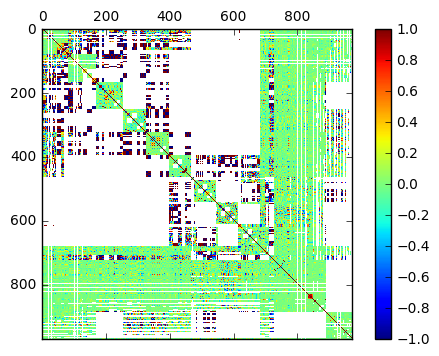

In [44]:
#http://machinelearningmastery.com/visualize-machine-learning-data-python-pandas/
fig = plt.figure()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr_matrix, vmin=-1, vmax=1)
fig.colorbar(cax)
plt.show()

In [57]:
#http://datascience.stackexchange.com/questions/12799/pandas-dataframe-to-dmatrix
#examples demo https://github.com/dmlc/xgboost/tree/master/demo/guide-python
from sklearn.cross_validation import train_test_split
train, test = train_test_split(train_df, test_size = 0.3)
train_target = train['Response']
train_data = train.drop(["Id"],axis=1)
xgtrain = xgb.DMatrix(train_data, train_target.values)
xgtest = xgb.DMatrix(test.drop(["Id"], axis=1))

In [58]:
#xgtest.feature_names
xgtrain.feature_names

[u'L0_S0_F0',
 u'L0_S0_F2',
 u'L0_S0_F4',
 u'L0_S0_F6',
 u'L0_S0_F8',
 u'L0_S0_F10',
 u'L0_S0_F12',
 u'L0_S0_F14',
 u'L0_S0_F16',
 u'L0_S0_F18',
 u'L0_S0_F20',
 u'L0_S0_F22',
 u'L0_S1_F24',
 u'L0_S1_F28',
 u'L0_S2_F32',
 u'L0_S2_F36',
 u'L0_S2_F40',
 u'L0_S2_F44',
 u'L0_S2_F48',
 u'L0_S2_F52',
 u'L0_S2_F56',
 u'L0_S2_F60',
 u'L0_S2_F64',
 u'L0_S3_F68',
 u'L0_S3_F72',
 u'L0_S3_F76',
 u'L0_S3_F80',
 u'L0_S3_F84',
 u'L0_S3_F88',
 u'L0_S3_F92',
 u'L0_S3_F96',
 u'L0_S3_F100',
 u'L0_S4_F104',
 u'L0_S4_F109',
 u'L0_S5_F114',
 u'L0_S5_F116',
 u'L0_S6_F118',
 u'L0_S6_F122',
 u'L0_S6_F132',
 u'L0_S7_F136',
 u'L0_S7_F138',
 u'L0_S7_F142',
 u'L0_S8_F144',
 u'L0_S8_F146',
 u'L0_S8_F149',
 u'L0_S9_F155',
 u'L0_S9_F160',
 u'L0_S9_F165',
 u'L0_S9_F170',
 u'L0_S9_F175',
 u'L0_S9_F180',
 u'L0_S9_F185',
 u'L0_S9_F190',
 u'L0_S9_F195',
 u'L0_S9_F200',
 u'L0_S9_F205',
 u'L0_S9_F210',
 u'L0_S10_F219',
 u'L0_S10_F224',
 u'L0_S10_F229',
 u'L0_S10_F234',
 u'L0_S10_F239',
 u'L0_S10_F244',
 u'L0_S10_F249',
 u'L0

In [59]:
#http://xgboost.readthedocs.io/en/latest/get_started/index.html#python
param = {'max_depth':2, 'eta':1, 'silent':1, 'objective':'binary:logistic' }
num_round = 2
bst = xgb.train(param, xgtrain, num_round)
# make prediction
#preds = bst.predict(xgtest)

In [60]:
preds = bst.predict(xgtest)

In [62]:
test_labels = test["Response"]
labels = test_labels.values
leng = len(preds)
esum = 0
for i in range(leng):
    stat = int(preds[i]>0.5)
    print preds[i], stat, int(stat), labels[i]
    if int(stat) != 1:
        esum += 1
print "error 5.f%" % (esum/float(leng))
#print 'error=%.5f' % (( sum(1 for i in range(len(preds)) if int(preds[i]>0.5)!=labels[i])) /float(len(preds)))

0.041796 0 0 0
0.958181 1 1 1
0.041796 0 0 0
0.041796 0 0 0
0.958181 1 1 1
0.958181 1 1 1
0.958181 1 1 1
0.958181 1 1 1
0.041796 0 0 0
0.041796 0 0 0
0.041796 0 0 0
0.041796 0 0 0
0.958181 1 1 1
0.041796 0 0 0
0.041796 0 0 0
0.041796 0 0 0
0.041796 0 0 0
0.041796 0 0 0
0.041796 0 0 0
0.041796 0 0 0
0.958181 1 1 1
0.041796 0 0 0
0.041796 0 0 0
0.958181 1 1 1
0.958181 1 1 1
0.958181 1 1 1
0.041796 0 0 0
0.958181 1 1 1
0.041796 0 0 0
0.958181 1 1 1
0.958181 1 1 1
0.041796 0 0 0
0.041796 0 0 0
0.041796 0 0 0
0.041796 0 0 0
0.041796 0 0 0
0.041796 0 0 0
0.041796 0 0 0
0.958181 1 1 1
0.041796 0 0 0
0.041796 0 0 0
0.041796 0 0 0
0.958181 1 1 1
0.958181 1 1 1
0.041796 0 0 0
0.958181 1 1 1
0.041796 0 0 0
0.041796 0 0 0
0.041796 0 0 0
0.958181 1 1 1
0.041796 0 0 0
0.958181 1 1 1
0.958181 1 1 1
0.041796 0 0 0
0.041796 0 0 0
0.958181 1 1 1
0.041796 0 0 0
0.041796 0 0 0
0.958181 1 1 1
0.958181 1 1 1
0.041796 0 0 0
0.041796 0 0 0
0.958181 1 1 1
0.958181 1 1 1
0.041796 0 0 0
0.041796 0 0 0
0.958181 1

ValueError: incomplete format

In [39]:
len(test.

array([ 0.04177959,  0.95819807,  0.04177959, ...,  0.04177959,
        0.04177959,  0.95819807], dtype=float32)

In [55]:
labels[0]

0

In [46]:
preds[11]

0.041779589